In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.font_manager as fm

font_path = '/Library/Fonts/Arial Unicode.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

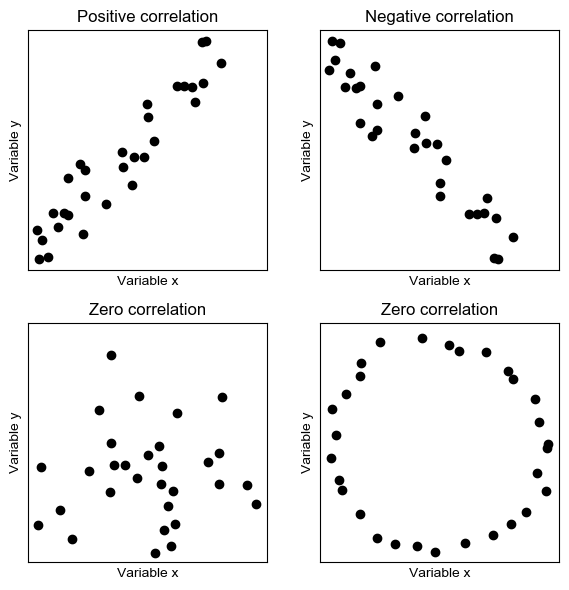

In [36]:

N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)


# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation',fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')


# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation',fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')


# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')


# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')


plt.tight_layout()
plt.savefig('Figure_03_01.png',dpi=300) # write out the fig to a file
plt.show()

## K-means Clustering

1. 데이터 공간 생성 후 임의의 데이터 공간에서 k개의 중심점을 초기화.
2. 각 데이터 관측치와 각 중심 사이의 유클리드 거리 계산
3. 각 데이터 관측치를 가장 가까운 중심의 그룹에 할당
4. 각 중심을 해당 중심에 할당된 모든 데이터 관측치의 평균으로 갱신
5. 수렴 기준을 만족할 때까지 또는 N회까지 2~4 단계를 반복.

In [37]:
np.random.seed(1)

data_space = np.random.uniform(low=-100, high=100, size=300)
data_space = data_space.reshape(-1, 2)

k = 3

# 두 벡터만 구할 때는 이렇게 하면 된다.
# def getDist(v1, v2):
  # return np.sum((v1 - v2) ** 2) ** .5

# 우리가 원하는 건 여러 데이터들을 한꺼번에 구하는것!
# 위와 같이 하려면 loop 돌면서 getDist()를 해야한다. => 비효율적임

# get k index!
ridx = np.random.choice(range(len(data_space)), k, replace=False)
centroids = data_space[ridx, :]
dists = np.zeros((data_space.shape[0], k))
# k와 모든 점들에 대해 loop를 돌면서 유클리드 distance를 구한다.
for ci in range(k):
  dists[:, ci] = np.sum((data_space - centroids[ci, 1]) ** 2, axis=1)

# 가장 가까운 거리들만 추출
groupidx = np.argmin(dists, axis=1)

# 기존에는 k를 랜덤으로 설정했으나 이젠 데이터들의 평균값을 가지고 k를 재설정
for ki in range(k):
  centroids[ki, :] = [
    np.mean(data_space[groupidx == ki, 0]),
    np.mean(data_space[groupidx == ki, 1])
  ]

# 위 과정들을 반복!!

In [38]:
# Exercise 1
def ccNcos(v1, v2):
  cos = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

  xm = v1 - np.mean(v1)
  ym = v2 - np.mean(v2)
  num = np.dot(xm, ym)
  den = np.linalg.norm(xm) * np.linalg.norm(ym)
  cc = num / den
  return cos, cc

# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = ccNcos(a,b)

# confirm that the correlation matches with np.corrcoef
# print(r,np.corrcoef(a,b)[0,1])

# sanity check
# 두 벡터의 방향이 완전히 같으면 1
t11 = np.array([1, 2])
t12 = np.array([2, 3])
t1_cos, t1_cc = ccNcos(t11, t12)
print(f"cos similarity: {t1_cos}, cc: {t1_cc}")
# scikit-learn 에서의 cos similarity는 2D array여야 하기 때문에 reshape 필요
print(f'cos similarity with library: {cosine_similarity(t11.reshape(1, -1), t12.reshape(1, -1))[0][0]}, cc with library: {np.corrcoef(t11, t12)}')
# scipy.spatial.distance.cosine 을 사용하면 얘는 cosine distance를 구해주는 얘라 식 수정 필요
# scipy.spatial.distance.cosine(t11, t12)
# 수직이면 0
# t21 = np.array([1, 0])
# t22 = np.array([0, 1])
# t2_cos, t2_cc = ccNcos(t21, t22)
# print(f"cos similarity: {t2_cos}, cc: {t2_cc}")

cos similarity: 0.9922778767136677, cc: 0.9999999999999998
cos similarity with library: 0.9922778767136676, cc with library: [[1. 1.]
 [1. 1.]]


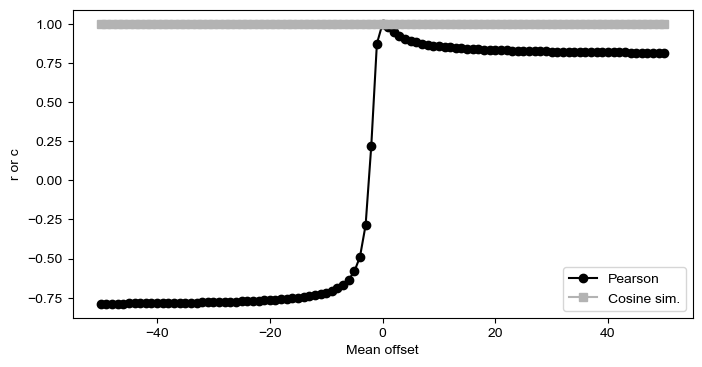

In [39]:
# Exercise 2
offsets = np.arange(-50, 51)
var = np.arange(4, dtype=float)

results = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
  results[i, :] = ccNcos(var, var + offsets[i])

plt.figure(figsize=(8, 4))
h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')
plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_03_02.png',dpi=300) # write out the fig to a file
plt.show()

In [40]:
# Exercise 3
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided')
Source:   
def pearsonr(x, y, *, alternative='two-sided'):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing da

In [41]:
# Exercise 4
def rho(x, y):
  xm = x - np.mean(x)
  ym = y - np.mean(y)
  n = np.dot(xm, ym)
  d = np.linalg.norm(x) * np.linalg.norm(y)
  return n / d

import time 

numIters = 1000
varLength = 500

tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength, 2)
  rho(x[:, 0], x[:, 1])
t1 = time.time() - tic

tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 110.65 ms
   pearsonr took 977.76 ms


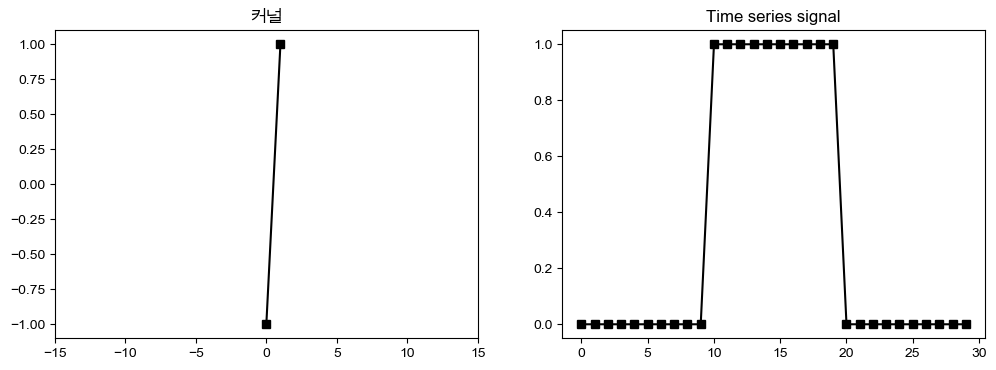

In [42]:
# Exercise 5
# 1. 두 시계열을 생성하는 코드 구현
# create kernel
kernel = np.array([-1, 1])  # to detect edge

# create signal
signal = np.zeros(30)
signal[10:20] = 1

_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('커널')
axs[0].set_xlim([-15, 15])

axs[1].plot(signal, 'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_04ab.png',dpi=300)
plt.show()

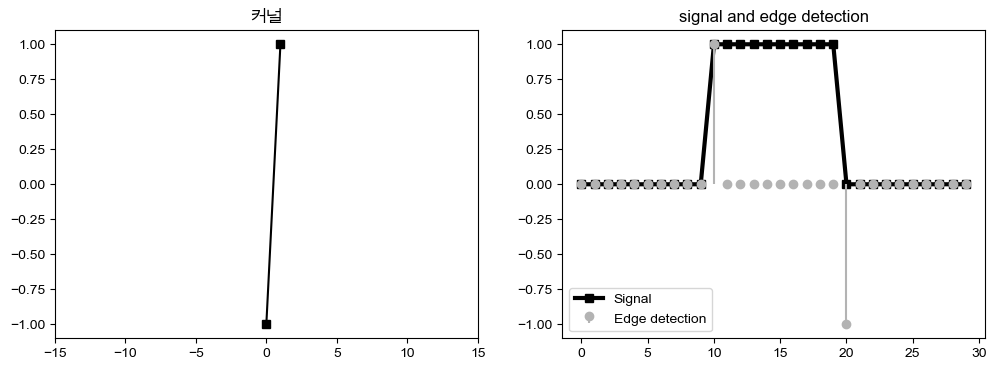

In [43]:
# 2. for loop 작성
featureMap = np.zeros(len(signal))

for t in range(1, len(signal) - 1):
  featureMap[t] = np.dot(kernel, signal[t-1:t+1])

_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('커널')
axs[0].set_xlim([-15, 15])

axs[1].plot(signal, 'ks-', label='Signal', linewidth=3)
axs[1].set_title('signal and edge detection')
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines, 'color', [.7, .7, .7])
plt.setp(markers, 'color', [.7, .7, .7])

axs[1].legend()
plt.savefig('Figure_03_04c.png',dpi=300)
plt.show()

3.4000000000000004


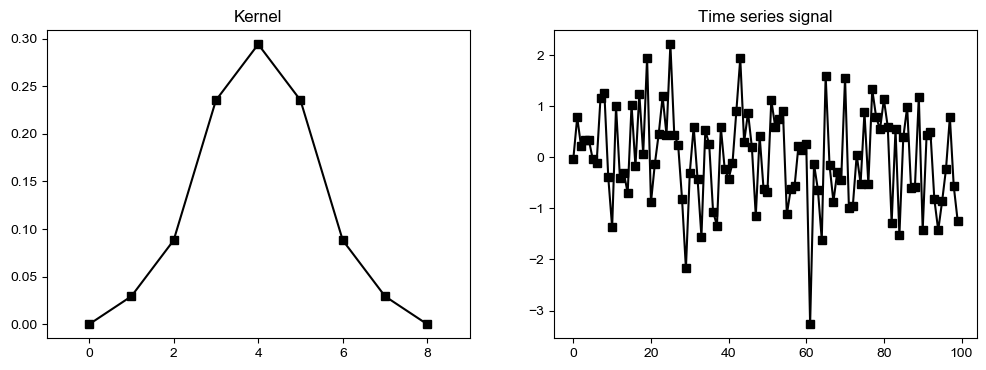

In [57]:
# Exercise 6
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

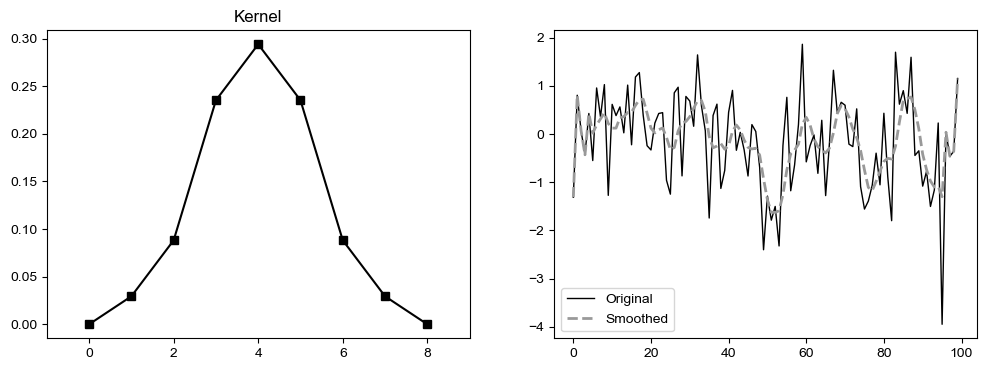

In [45]:
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_03_06c.png',dpi=300)
plt.show()

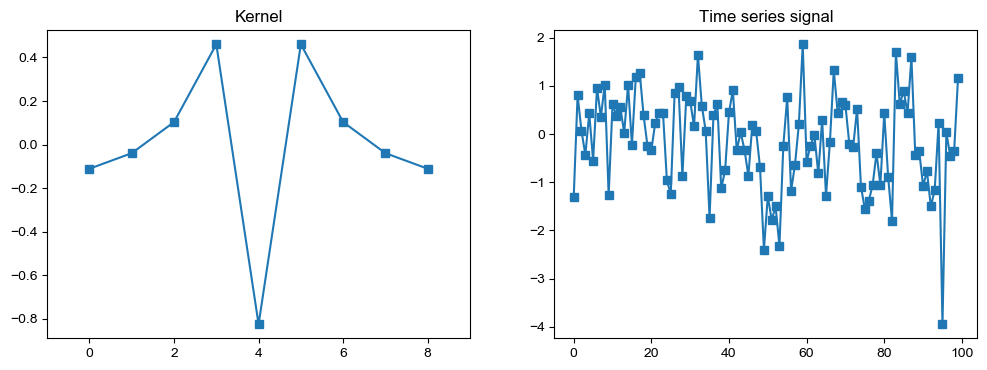

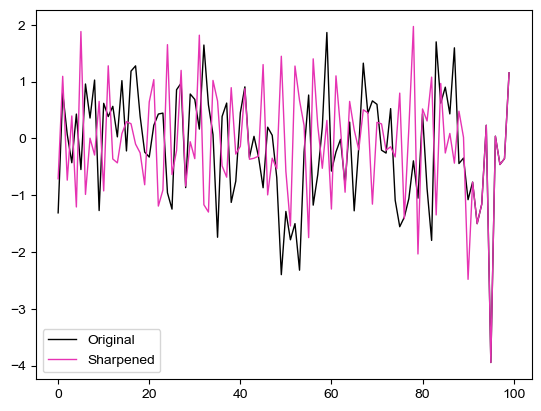

In [56]:
# Exercise 7
# define the kernel (a sorta-kinda Gaussian)
# high-pass filter(부드러운(낮은 주파수)의 특징을 감쇄하고 날카로운(높은 주파수)의 특징을 강조하는 필터). 위의 low-pass filter에서 가운데 값만 1 -> -1로 변경 후
# 중앙 평균화 했음.
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
# 중앙 평균화
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,len(kernel)])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()

# loop over the signal time point
filtsig2 = timeseries.copy()
# 이거 범위 정할 때 대체로 커널의 중간값을 기준으로 두고 데이터에 iteration - half - , iteration + half 느낌으로 많이 간다. 
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])
# 물론 당연히 half를 기준으로 안해도 왼쪽 값을 둬도 같음. 아래처럼.
# for t in range(0, Nsignal - len(kernel)):
#   filtsig2[t] = np.dot(kernel, timeseries[t: t + len(kernel)])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

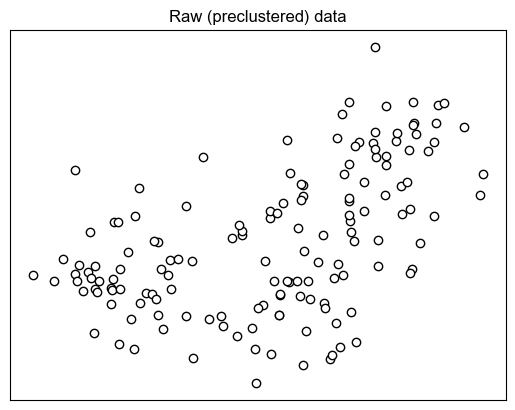

In [77]:
# Exercise 8
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur] # (2, 50)
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

data = np.transpose(np.concatenate((a, b, c), axis=1))

plt.plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()


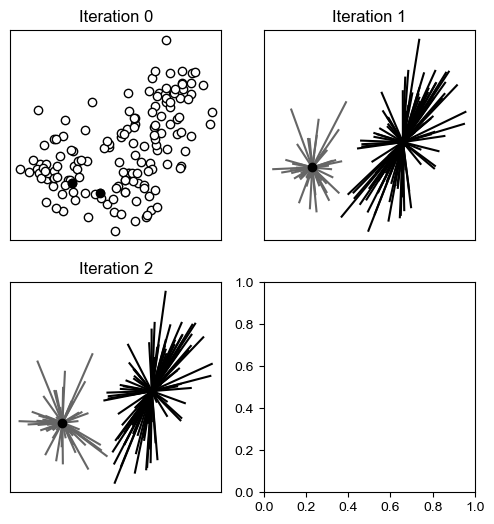

In [96]:
k = 3
# get random cluster centers (randomly sampled data points)
rix = np.random.choice(range(len(data)), k, replace=False)
centroids = data[rix, :]

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm', red, blue, magenta

axs[0].plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0], centroids[:,1], 'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])


for iteri in range(len(centroids)):
  # step 1: compute distances
  dists = np.zeros((data.shape[0], k))
  for ci in range(k):
    dists[:, ci] = np.sum((data - centroids[ci, :]) ** 2, axis=1)

  # step 2: assign to group based on minimum distance
  # 가까운 거리를 계산
  groupidx = np.argmin(dists, axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki, :] = [
        np.mean(data[groupidx == ki, 0]),
        np.mean(data[groupidx == ki, 1])
      ]

  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri + 1].plot(centroids[:, 0], centroids[:, 1], 'ko')
  axs[iteri + 1].set_title(f"Iteration {iteri+1}")
  axs[iteri + 1].set_xticks([])
  axs[iteri + 1].set_yticks([])

plt.savefig('Figure_03_03.png', dpi=300)
plt.show()
